In [1]:
#1. Import thư viện cần thiết
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics
import sklearn.preprocessing
import datetime
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [2]:
#2. Đọc dữ liệu từ file
df = pd.read_csv('/content/SONY.csv')

In [3]:
#3. Làm sạch dữ liệu
df['Open'] = df['Open'].replace(0, df['Open'].mean())
df['High'] = df['High'].replace(0, df['High'].mean())
df['Low'] = df['Low'].replace(0, df['Low'].mean())
df['Close'] = df['Close'].replace(0, df['Close'].mean())
df

,Date,Close,Open,High,Low
0,2019-03-01,47.89,47.8200,48.060,47.6900
1,2019-03-02,47.89,47.8200,48.060,47.6900
2,2019-03-03,47.89,47.8200,48.060,47.6900
3,2019-03-04,47.62,47.7800,47.870,47.2300
4,2019-03-05,47.66,47.7500,47.900,47.5300
...,...,...,...,...,...
1915,2024-05-28,79.86,80.7500,80.770,79.7700
1916,2024-05-29,78.45,78.9900,79.370,78.3400
1917,2024-05-30,80.79,80.4800,81.260,80.1500
1918,2024-05-31,82.34,81.7500,82.380,81.4700


In [4]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Chọn features và target
X = df[['Open', 'High', 'Low']]
y = df['Close']

train_size = int(0.6 * len(df))
test_size = int(0.4 * len(df))

train_data = df[:train_size]
test_data = df[train_size:]

X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

# Khởi tạo mô hình
model = XGBRegressor()

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán kết quả trên tập train và tập test
train_predict = model.predict(X_train)
predictions_xgb = model.predict(X_test)

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Tính Mean Absolute Error
mae = mean_absolute_error(y_test, predictions_xgb)
print(f"Mean Absolute Error (MAE): {mae}")

# Tính Mean Squared Error
mse = mean_squared_error(y_test, predictions_xgb)
print(f"Mean Squared Error (MSE): {mse}")

# Tính R-squared
r2 = r2_score(y_test, predictions_xgb)
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 0.5301227483352027
Mean Squared Error (MSE): 0.516853493680694
R-squared (R2): 0.9902923173482674


**Dự đoán 30 ngày tiếp theo**

In [7]:
import numpy as np

# Chuyển y_test thành NumPy array trước khi gọi reshape
x_input = X_test.iloc[-1].to_numpy().reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output = []
n_steps = 100
i = 0

while(i < 30):
    if(len(temp_input) > 3):
        # Chỉ lấy 3 phần tử cuối cùng
        x_input = np.array(temp_input[-3:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, -1))
        # Dự đoán
        yhat = model.predict(x_input)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, -1))
        yhat = model.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat.tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1

# Chuyển lst_output thành mảng numpy
predictions_next_30_days = np.array(lst_output)

# In kết quả dự đoán 30 ngày tiếp theo
print(f"Predictions for the next 30 days: {predictions_next_30_days}")


80.59008
4
1 day input [80.945      79.9325     80.59008026]
1 day output [79.72131]
2 day input [79.9325     80.59008026 79.72131348]
2 day output [79.91074]
3 day input [80.59008026 79.72131348 79.91074371]
3 day output [79.72131]
4 day input [79.72131348 79.91074371 79.72131348]
4 day output [79.716385]
5 day input [79.91074371 79.72131348 79.71638489]
5 day output [79.72131]
6 day input [79.72131348 79.71638489 79.72131348]
6 day output [79.716385]
7 day input [79.71638489 79.72131348 79.71638489]
7 day output [79.716385]
8 day input [79.72131348 79.71638489 79.71638489]
8 day output [79.716385]
9 day input [79.71638489 79.71638489 79.71638489]
9 day output [79.716385]
10 day input [79.71638489 79.71638489 79.71638489]
10 day output [79.716385]
11 day input [79.71638489 79.71638489 79.71638489]
11 day output [79.716385]
12 day input [79.71638489 79.71638489 79.71638489]
12 day output [79.716385]
13 day input [79.71638489 79.71638489 79.71638489]
13 day output [79.716385]
14 day inp

**Dự đoán 60 ngày tiếp theo**

In [8]:
import numpy as np

# Chuyển y_test thành NumPy array trước khi gọi reshape
x_input = X_test.iloc[-1].to_numpy().reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output = []
n_steps = 100
i = 0

while(i < 60):
    if(len(temp_input) > 3):
        # Chỉ lấy 3 phần tử cuối cùng
        x_input = np.array(temp_input[-3:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, -1))
        # Dự đoán
        yhat = model.predict(x_input)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, -1))
        yhat = model.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat.tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1

# Chuyển lst_output thành mảng numpy
predictions_next_60_days = np.array(lst_output)

# In kết quả dự đoán 30 ngày tiếp theo
print(f"Predictions for the next 30 days: {predictions_next_60_days}")


80.59008
4
1 day input [80.945      79.9325     80.59008026]
1 day output [79.72131]
2 day input [79.9325     80.59008026 79.72131348]
2 day output [79.91074]
3 day input [80.59008026 79.72131348 79.91074371]
3 day output [79.72131]
4 day input [79.72131348 79.91074371 79.72131348]
4 day output [79.716385]
5 day input [79.91074371 79.72131348 79.71638489]
5 day output [79.72131]
6 day input [79.72131348 79.71638489 79.72131348]
6 day output [79.716385]
7 day input [79.71638489 79.72131348 79.71638489]
7 day output [79.716385]
8 day input [79.72131348 79.71638489 79.71638489]
8 day output [79.716385]
9 day input [79.71638489 79.71638489 79.71638489]
9 day output [79.716385]
10 day input [79.71638489 79.71638489 79.71638489]
10 day output [79.716385]
11 day input [79.71638489 79.71638489 79.71638489]
11 day output [79.716385]
12 day input [79.71638489 79.71638489 79.71638489]
12 day output [79.716385]
13 day input [79.71638489 79.71638489 79.71638489]
13 day output [79.716385]
14 day inp

**Dự đoán 90 ngày tiếp theo**

In [9]:
import numpy as np

# Chuyển y_test thành NumPy array trước khi gọi reshape
x_input = X_test.iloc[-1].to_numpy().reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output = []
n_steps = 100
i = 0

while(i < 90):
    if(len(temp_input) > 3):
        # Chỉ lấy 3 phần tử cuối cùng
        x_input = np.array(temp_input[-3:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, -1))
        # Dự đoán
        yhat = model.predict(x_input)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, -1))
        yhat = model.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat.tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1

# Chuyển lst_output thành mảng numpy
predictions_next_90_days = np.array(lst_output)

# In kết quả dự đoán 30 ngày tiếp theo
print(f"Predictions for the next 30 days: {predictions_next_90_days}")


80.59008
4
1 day input [80.945      79.9325     80.59008026]
1 day output [79.72131]
2 day input [79.9325     80.59008026 79.72131348]
2 day output [79.91074]
3 day input [80.59008026 79.72131348 79.91074371]
3 day output [79.72131]
4 day input [79.72131348 79.91074371 79.72131348]
4 day output [79.716385]
5 day input [79.91074371 79.72131348 79.71638489]
5 day output [79.72131]
6 day input [79.72131348 79.71638489 79.72131348]
6 day output [79.716385]
7 day input [79.71638489 79.72131348 79.71638489]
7 day output [79.716385]
8 day input [79.72131348 79.71638489 79.71638489]
8 day output [79.716385]
9 day input [79.71638489 79.71638489 79.71638489]
9 day output [79.716385]
10 day input [79.71638489 79.71638489 79.71638489]
10 day output [79.716385]
11 day input [79.71638489 79.71638489 79.71638489]
11 day output [79.716385]
12 day input [79.71638489 79.71638489 79.71638489]
12 day output [79.716385]
13 day input [79.71638489 79.71638489 79.71638489]
13 day output [79.716385]
14 day inp

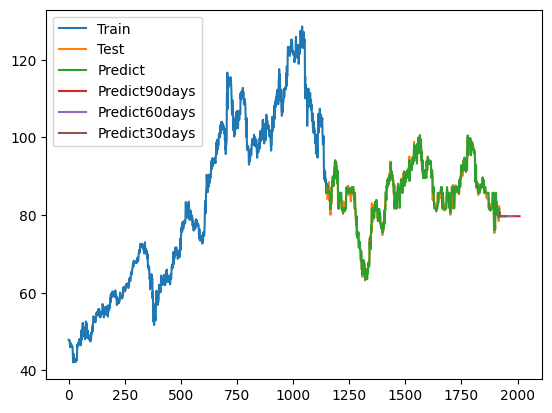

In [10]:
# Plotting
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, y_train)

test_data_index = pd.RangeIndex(start=train_size, stop=train_size + len(y_test), step=1)
plt.plot(test_data_index, y_test)

# Adjusting y_pred to have correct shape and length
test_data_index_pred = pd.RangeIndex(start=train_size, stop=train_size + len(predictions_xgb), step=1)
plt.plot(test_data_index_pred, predictions_xgb)

# Adjusting lst_output_60 to have correct shape and length
prediect_data_index = pd.RangeIndex(start=len(df), stop=len(df) + len(predictions_next_90_days), step=1)
plt.plot(prediect_data_index, predictions_next_90_days)
prediect_data_index = pd.RangeIndex(start=len(df), stop=len(df) + len(predictions_next_60_days), step=1)
plt.plot(prediect_data_index, predictions_next_60_days)
prediect_data_index = pd.RangeIndex(start=len(df), stop=len(df) + len(predictions_next_30_days), step=1)
plt.plot(prediect_data_index, predictions_next_30_days)

plt.legend(['Train', 'Test', 'Predict', 'Predict90days', 'Predict60days', 'Predict30days'])
plt.show()